<h2>Part 1 Exploratory Analysis</h2>
    <p>Objective</p>
    <ol><li>Import all required libraries</li>
    <li>Find initial dimension of data</li>
        <li>Convert the features to their appropriate data types </li>
        <li>See if the data is skewed or not</li>

<h3>1.Import libraries</h3>
<p> The most important library used is the <b>pandas</b>, this enables the csv to be converted to a pandas datatype and allow data manipulation. <b>Numpy</b> library adds array like functionalities to python for scientific calculations. The visulaization is carried out using <b>Matplotlib</b> and <b>Seaborn</b>. The Counter data structure from collections is used to obtain the count of unique objects in a more efficent manner. Some libraries are not added here as having them imported later with initialization will be easier for readability

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

In [35]:
import warnings
warnings.simplefilter('ignore')
# This option enables auto complete in notebook
%config IPCompleter.greedy=True

In [51]:
# Load csv to pandas dataframe
df = pd.read_csv('heart-train.csv')
# Enables viewing of all columns when using the head and tail command
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Show full column with out truncation
pd.set_option('display.max_colwidth', -1)

In [62]:
test = pd.read_csv('heart-test.csv')

<h3>2.Get initial dimension of dataframe</h3>

In [37]:
df.shape

(199, 13)

<blockquote>The dataframe initially has dimension of 199 x 13 which means there are 13 columns of attributes and 199 rows of data</blockquote>

<h3>3.Getting an overview of data </h3>
<p>by checking first 5 and last 5 data by using head() and tail() functions</p>

In [38]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,60.0,0,253,0,35,0,279000.00,1.70,140,1,0,250,0
1,40.0,1,129,0,35,0,255000.00,0.90,137,1,0,209,0
2,86.0,0,582,0,38,0,263358.03,1.83,134,0,0,95,1
3,45.0,0,582,0,35,0,385000.00,1.00,145,1,0,61,1
4,72.0,0,127,1,50,1,218000.00,1.00,134,1,0,33,0


In [39]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
194,42.0,0,64,0,30,0,215000.0,3.8,128,1,1,250,0
195,49.0,0,789,0,20,1,319000.0,1.1,136,1,1,55,1
196,42.0,1,250,1,15,0,213000.0,1.3,136,0,0,65,1
197,72.0,1,328,0,30,1,621000.0,1.7,138,0,1,88,1
198,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0


<blockquote>Looking at the initial data we get a rough idea about what kind of data we are dealing with. Initial inspection shows that all data are numeric and has a large range indicating that some form of normalization must be carried out</blockquote>

<h3>3.Getting general statistical overview of data </h3>
<p>Use the describe function to get statistical information on all the numeric data</p>

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,199.0,60.822447,12.234419,40.0,50.00,60.0,70.0,95.0
anaemia,199.0,0.417085,0.494321,0.0,0.00,0.0,1.0,1.0
creatinine_phosphokinase,199.0,634.834171,1095.704449,30.0,121.50,292.0,582.0,7861.0
diabetes,199.0,0.442211,0.497902,0.0,0.00,0.0,1.0,1.0
ejection_fraction,199.0,39.050251,12.255178,15.0,30.00,38.0,45.0,80.0
high_blood_pressure,199.0,0.336683,0.473767,0.0,0.00,0.0,1.0,1.0
platelets,199.0,263207.339698,97202.912278,25100.0,216500.00,263000.0,302500.0,850000.0
serum_creatinine,199.0,1.403518,0.972159,0.6,0.95,1.1,1.5,9.0
serum_sodium,199.0,136.693467,4.583844,113.0,134.00,137.0,140.0,148.0
sex,199.0,0.643216,0.480258,0.0,0.00,1.0,1.0,1.0


Lets look at the how well the target data is distributed

0    135
1    64 
Name: DEATH_EVENT, dtype: int64


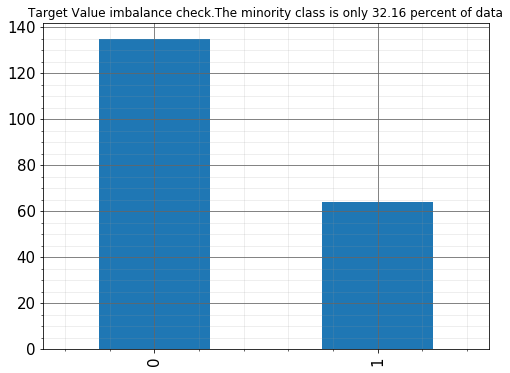

In [41]:
print(df['DEATH_EVENT'].value_counts())
df['DEATH_EVENT'].value_counts().plot(kind='bar', figsize=(8,6),title="Target Value imbalance check.The minority class is only %0.2f percent of data"%(Counter(df["DEATH_EVENT"])[1]/len(df)*100),fontsize=15)
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

Looking at the count for the two classes we can see that the classes are imbalanced
<blockquote>Observations</blockquote>
<ul>
<li>135 data points classified as 0.</li>
<li>64 data points classfifed as 1</li>
<li>Minority class only makes 32.16 percent of the data</li>
</ul>



<h3> Finding out all the null values in attributes</h3>

In [42]:
df[df.columns].isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<blockquote>Observation</blockquote>
The dataset doesn't have any missing values which indicates that the data may be of high quality and already preprocessed 

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

plt.show()

<h3> Prepration of data for training and evaluvation</h3>
In order for training to done we now have to split the dataframe into input and target

In [52]:
# Seperating to target value
y = df.pop('DEATH_EVENT').values
# Class attribute is now redundant therefore removing it
# Training input dataframe
X = df.values
y=y.astype('int')

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state=42)



In [57]:
gboost = GradientBoostingClassifier(random_state=0)
y_pred = gboost.fit(X_train, y_train).predict(X_test)

print(f'Accuracy of Decision tree is at:  {accuracy_score(y_pred, y_test)*100:.2f}% ')


Accuracy of Decision tree is at:  73.13% 


Confusion matrix, without normalization
[[37  5]
 [13 12]]


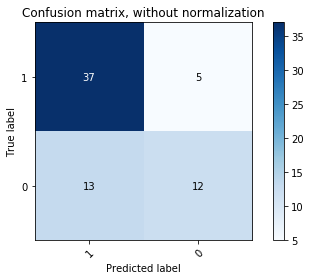

In [61]:
plot_confusion_matrix(y_test, y_pred, classes=[1,0],
                      title='Confusion matrix, without normalization')

In [60]:
report = classification_report(y_test, y_pred)
print("Report:\n{}".format(report)) 

Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        42
           1       0.71      0.48      0.57        25

    accuracy                           0.73        67
   macro avg       0.72      0.68      0.69        67
weighted avg       0.73      0.73      0.72        67



In [63]:
y_pred_test = gboost.fit(X_train, y_train).predict(test)

ValueError: Number of features of the model must match the input. Model n_features is 12 and input n_features is 13 

In [64]:
test.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,95.0,1,112,0,40,1,196000.00,1.0,138,0,0,24,1
1,44.0,0,582,1,30,1,263358.03,1.6,130,1,1,244,0
2,68.0,1,220,0,35,1,289000.00,0.9,140,1,1,20,1
3,55.0,0,47,0,35,1,173000.00,1.1,137,1,0,79,0
4,60.0,0,68,0,20,0,119000.00,2.9,127,1,1,64,1
